# HLA-Analysis of different groups from xlsx file

In [24]:
import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.patches as mpatches
from openpyxl import load_workbook
from itertools import groupby
import csv
import random
from scipy.stats import chi2_contingency
import statsmodels
import statsmodels.api as sm
import numpy as np

## Functions

In [25]:
# Import groups

gene_column_dict = {
    "A": 1,
    "B": 3,
    "C": 5,
    "DRB1": 7,
    "DQB1": 9,
} 

allele1_colnumbers = (gene_column_dict["A"], gene_column_dict["B"], gene_column_dict["C"], \
                      gene_column_dict["DRB1"],gene_column_dict["DQB1"])
allele2_colnumbers = (gene_column_dict["A"]+1, gene_column_dict["B"]+1, gene_column_dict["C"]+1, \
                      gene_column_dict["DRB1"]+1,gene_column_dict["DQB1"]+1)
allele12_colnumbers = (gene_column_dict["A"], gene_column_dict["A"]+1, \
                       gene_column_dict["B"], gene_column_dict["B"]+1, \
                       gene_column_dict["C"], gene_column_dict["C"]+1, \
                       gene_column_dict["DRB1"], gene_column_dict["DRB1"]+1, \
                       gene_column_dict["DQB1"], gene_column_dict["DQB1"]+1)


def clean_from_gene_name(hla_value):
    """ Return allele without gene
        for ex '02:01:01G' instead of 'A*02:01:01G'"""
    return str(str(hla_value).split('*')[-1])

def cut_two_levels(string):
    """ Return two levels of allele
        for ex '02:01' instead of '02:01:01G'"""
    levels_split=string.split(":")
    return int(levels_split[0]), int(levels_split[1])
    
def make_arrays(workbook,column_number):
    len_workbook = workbook.max_row
    """ Return two allels of gene by sheet, column number of first one"""
    array_column_1 = []
    array_column_2 = []
    for i in range(2, len_workbook+1):
        if (workbook[i][column_number].value is not None) and (":" in workbook[i][column_number].value):
            array_column_1.append(cut_two_levels(clean_from_gene_name(workbook[i][column_number].value)))
            if workbook[i][column_number+1].value == '-':
                array_column_2.append(cut_two_levels(clean_from_gene_name(workbook[i][column_number].value)))
            else:
                array_column_2.append(cut_two_levels(clean_from_gene_name(workbook[i][column_number+1].value)))
    return array_column_1, array_column_2

def cut_two_levels(string):
    levels_split=string.split(":")
    return int(levels_split[0]), int(levels_split[1])


# Plots

def plot_dots(array_to_plot1, array_to_plot2, colour, size):
    for i in range (0, len(array_to_plot1)):
        plt.plot(array_to_plot1[i][0], array_to_plot1[i][1], colour, markersize=size)
        plt.plot(array_to_plot2[i][0], array_to_plot2[i][1], colour, markersize=size)

# Plot one-gene-allels variety for few groups
def plot_for_gene(gene_name, array_of_groups, label_names, array_of_colour, \
                  array_of_size, wi, hi, plot_title):
    """ Plot gene for few groups. 
        Example input:
        gene_name = 'A'
        array_of_groups = [alife_was_not_ill_workbook, alife_was_ill_workbook, dead_workbook]
        label_names = ['alife was not ill', 'alife was ill', 'dead']
        array_of_colour = ['bo', 'ro', 'yo']
        array_of_size = [15, 10, 6]
        title_name = 'first and second levels dead, alife and was/was not ill alife'
        width_in_inches = 20
        height_in_inches = 15"""
    width_in_inches = wi
    height_in_inches = hi
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 12}
    plt.figure(figsize=(width_in_inches, height_in_inches))
    plt.xlabel('first level')
    plt.ylabel('second level')
    plt.title(plot_title + ' ' + gene_name + ' gene')
    patches = []
    for i in range (len(array_of_groups)):
        current_array1, current_array2 = make_arrays(array_of_groups[i],gene_column_dict[gene_name])
        #print(current_array1, '\n\n', current_array2)
        plt.plot(current_array1[0], current_array2[0], array_of_colour[i], \
                 markersize=array_of_size[i], label=label_names[i])
        plot_dots(current_array1, current_array2, array_of_colour[i], array_of_size[i])
    plt.legend()
    plt.show()
    
# Plot first level frequency distribution
def Extract(lst,num): 
    return [item[num] for item in lst]

def value_level1_frequency_count(array_values):
    array_level1 = array_values
    array_level1.sort(key=None, reverse=False)
    array_level1_count = [(key, len(list(group))) for key, group in groupby(array_level1)]
    summ=sum(Extract(array_level1_count,1))
    array_level1_count_frequency = [(str(pixel[0]), pixel[1]*100/summ) for pixel in array_level1_count]
    return array_level1_count_frequency

def plot_value_count(tuple_value_count_array,colour_custom,label_name):
    plt.plot(Extract(tuple_value_count_array,0),Extract(tuple_value_count_array,1),colour_custom, \
             label = label_name, markersize=10)

def plot_frequency_distribution_for_gene(gene_name, array_of_groups, label_names, array_of_colour, \
                                         array_of_size, wi, hi):
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 12}
    width_in_inches = wi
    height_in_inches = hi
    plt.figure(figsize=(width_in_inches, height_in_inches))
    plt.xlabel('value')
    plt.ylabel('frequency, %')
    plt.title('Gene '+gene_name+' frequency distribution')
    for i in range (len(array_of_groups)):
        current_array1, current_array2 = make_arrays(array_of_groups[i],gene_column_dict[gene_name])
        current_array1_first_level = [item[0] for item in current_array1]
        current_array2_first_level = [item[0] for item in current_array2]
        plot_value_count(value_level1_frequency_count(current_array1_first_level + current_array2_first_level),\
                         array_of_colour[i],label_names[i])
    plt.legend()
    plt.show()
    

#MAKE INPUT FOR ARLEQUIN SOFT

def make_arrays_arlequin(workbook,column_number):
    len_workbook = workbook.max_row + 1
    array_column_1=[]
    array_column_2=[]
    for i in range(2, len_workbook+1):
        if (workbook[i][column_number].value is not None) and (":" in workbook[i][column_number].value):
            array_column_1.append(clean_from_gene_name(workbook[i][column_number].value))
            if workbook[i][column_number+1].value == '-':
                array_column_2.append(clean_from_gene_name(workbook[i][column_number].value))
            else:
                array_column_2.append(clean_from_gene_name(workbook[i][column_number+1].value))            
    return array_column_1, array_column_2

def cut_two_levels_split_arlequin(string):
    levels_split=string.split(":")
    return (clean_from_gene_name(levels_split[0].strip()+':'+levels_split[1].strip()))


def makepatient_2_figures_arlequin(workbook):
    ''' make input for ARLEQUIN soft
        Example:
        makepatient_2_figures_arlequin(alife_was_ill_gerontology_workbook)
    '''
    len_workbook = workbook.max_row + 1
    number_of_people=0
    for i in range(2, len_workbook+1):
        if (workbook[i][0].value is not None):
            number_of_people+=1
            print('        ',workbook[i][0].value,'   1      ',end='')
            for column_number in allele1_colnumbers:
                print (cut_two_levels_split_arlequin(workbook[i][column_number].value),end=' ')
            print('\n','                         ',end='')
            for column_number in allele2_colnumbers:
                if workbook[i][column_number].value == '-':
                    print (cut_two_levels_split_arlequin(workbook[i][column_number-1].value),end=' ')
                else:
                    print (cut_two_levels_split_arlequin(workbook[i][column_number].value),end=' ')
            print('\n', end='')
    print('number of people ',number_of_people)
    
def add_last_colon(allel_name):
    if allel_name[-1:] == "G" and allel_name[-2:] != ":G":
        allel_name = allel_name[:-1] + ':G'
    return(allel_name)

def makepatient_arlequin(workbook):
    len_workbook = workbook.max_row + 1
    number_of_people=0
    for i in range(2, len_workbook+1):
        if (workbook[i][0].value is not None):
            number_of_people+=1
            print('        ',workbook[i][0].value,'   1      ',end='')
            for column_number in allele1_colnumbers:
                print (add_last_colon_arlequin(workbook[i][column_number].value),end=' ')
            print('\n','                         ',end='')
            for column_number in allele2_colnumbers:
                if workbook[i][column_number].value == '-':
                    print (add_last_colon(workbook[i][column_number-1].value),end=' ')
                else:
                    print (add_last_colon(workbook[i][column_number].value),end=' ')
            print('\n', end='')
    print('number of people ',number_of_people)
     
    
        
# MAKE POPULATION HLA-DATA TABLE
# make
def makepatient_2_figures_table(workbook):
    number_of_people=0
    print ('patient\tA*\t\tB*\t\tC*\t\tDRB1*\t\tDQB1*')
    for i in range(2, workbook.max_row+1):
        if (workbook[i][0].value is not None):
            number_of_people+=1
            print(workbook[i][0].value,'\t',end='')
            for column_number in allele12_colnumbers:
                if workbook[i][column_number].value == '-':
                    print (cut_two_levels_split_arlequin(workbook[i][column_number-1].value),end='\t')
                else:
                    print (cut_two_levels_split_arlequin(workbook[i][column_number].value),end='\t')
            print('\n', end='')
    print('number of people ',number_of_people)

#make and save
def makepatient_2_figures_table_csv(workbook,output_name):
    number_of_people=0
    output_csv=output_name+'.csv'
    with open(output_csv, 'w', newline='\n') as file_output:
        writer = csv.writer(file_output)
        writer.writerow(['patient','A*','','B*','','C*','','DRB1*','','DQB1*'])
        for i in range(2, workbook.max_row+1):
            if (workbook[i][0].value is not None):
                current_patient=[]
                number_of_people+=1
                current_patient.append(workbook[i][0].value)
                for column_number in allele12_colnumbers:
                    if workbook[i][column_number].value == '-':
                        current_patient.append(cut_two_levels_split_arlequin(workbook[i][column_number-1].value))
                    else:
                        current_patient.append(cut_two_levels_split_arlequin(workbook[i][column_number].value))
                writer.writerow(current_patient)
    print('number of people ',number_of_people,'\ndone')

## Import file with data 

In [26]:
# Each group on its own worksheet
HLA_avg2020="/home/irinab/Desktop/HLA/SARS_GWAS/data_plus_gerontology/Data_covid_for_article.xlsx"
HLA_avg2020_workbook = load_workbook(filename=HLA_avg2020)
HLA_avg2020_workbook.sheetnames

['Group_I+II+III+IV',
 'Group_I',
 'Group_II',
 'Group_I+II',
 'Group_III',
 'Group_IIIA',
 'Group_IIIB',
 'Group_II+III',
 'Group_II+IIIA',
 'Group_I+II+III',
 'Group_IV',
 'Group_IVA',
 'Group_IVB',
 'Group_IVC',
 'Group_IVD',
 'Group_II+IV',
 'Group_II+III+IV',
 'Group_students',
 'Died_with_add_data',
 'Group_Russia']

### import groups from xlsx sheets to array

In [27]:
# I - who didn’t suffer from COVID-19
# II - who recovered from COVID-19 with mild symptoms
# III - who recovered from COVID-19 with severe symptoms
# IV - who died in Moscow clinics from coronavirus disease COVID-19

group_all = HLA_avg2020_workbook["Group_I+II+III+IV"]
group_Russia = HLA_avg2020_workbook["Group_Russia"]

alife_was_not_ill_workbook = HLA_avg2020_workbook["Group_I"] #I
alife_was_ill_workbook = HLA_avg2020_workbook["Group_II"] #II
alife_was_ill_gerontology_workbook = HLA_avg2020_workbook["Group_III"] # III
dead_workbook = HLA_avg2020_workbook["Group_IV"] #IV

students_workbook = HLA_avg2020_workbook["Group_I+II"] #I+II
alife_was_ill_students_gerontology_workbook = HLA_avg2020_workbook["Group_II+III"] #II+III
studentsilldead_workbook = HLA_avg2020_workbook["Group_II+IV"] #II+IV

alife_workbook = HLA_avg2020_workbook["Group_I+II+III"] # I+II+III
suffered_workbook = HLA_avg2020_workbook["Group_II+III+IV"] # II+III+IV

alife_was_ill_gerontology_workbook_less65 = HLA_avg2020_workbook["Group_IIIA"] # IIIA
alife_was_ill_gerontology_workbook_more65 = HLA_avg2020_workbook["Group_IIIB"] # IIIB

dead_workbook_less65 = HLA_avg2020_workbook["Group_IVA"] # IVA
dead_workbook_more65 = HLA_avg2020_workbook["Group_IVB"] # IVB
dead_acc_ill = HLA_avg2020_workbook["Group_IVC"] # IVC
dead_no_acc_ill = HLA_avg2020_workbook["Group_IVD"] # IVD

# Plot groups size

No handles with labels found to put in legend.


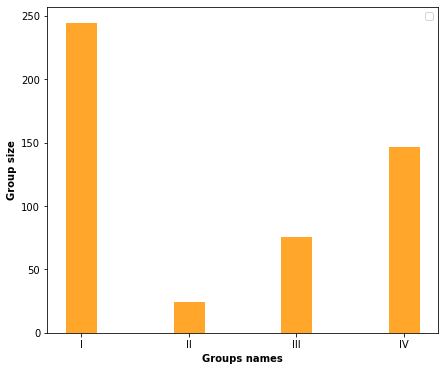

In [54]:
### custom
# order is important!
pop_names=['I','II','III','IV']
pop_arr_plot = [alife_was_not_ill_workbook,\
                alife_was_ill_workbook,\
                alife_was_ill_gerontology_workbook,\
                dead_workbook]
barWidth = 0.3
width_in_inches = 7
height_in_inches = 6
custom_color = '#ffa62b'
save_fig = 'yes' # yes/no
name_fig = 'count_all_groups_I_II_III_IV.jpg'


### code
pop_count = []
for item in pop_arr_plot:
    pop_count.append(item.max_row-1)
 
plt.figure(figsize=(width_in_inches, height_in_inches))
bars1 = pop_count
r1 = np.arange(len(bars1))
barlist=plt.bar(r1, bars1, color=custom_color, width=barWidth, edgecolor='white')#, label='group IIIA')
plt.xlabel('Groups names', fontweight='bold')
plt.ylabel('Group size', fontweight='bold')
plt.xticks([r for r in range(len(bars1))], pop_names)
plt.legend()
if save_fig == 'yes':
    plt.savefig(name_fig, bbox_inches='tight', dpi=800)
plt.show()

### Example of taking A-gene allels

In [111]:
# array_allele1, array_allele2 = make_arrays(workbook, number of column for allele1)
dead_A1,dead_A2 = make_arrays(dead_workbook,gene_column_dict["A"])

alife_A1,alife_A2 = make_arrays(alife_workbook,gene_column_dict["A"])

alife_was_ill_workbook_A1,alife_was_ill_workbook_A2 = \
    make_arrays(alife_was_ill_workbook,gene_column_dict["A"])

alife_was_not_ill_workbook_A1,alife_was_not_ill_workbook_A2 = \
    make_arrays(alife_was_not_ill_workbook,gene_column_dict["A"])

alife_was_ill_gerontology_workbook_A1,alife_was_ill_gerontology_workbook_A2 = \
    make_arrays(alife_was_ill_gerontology_workbook,gene_column_dict["A"])

## Plot one-gene-allels variety for few groups



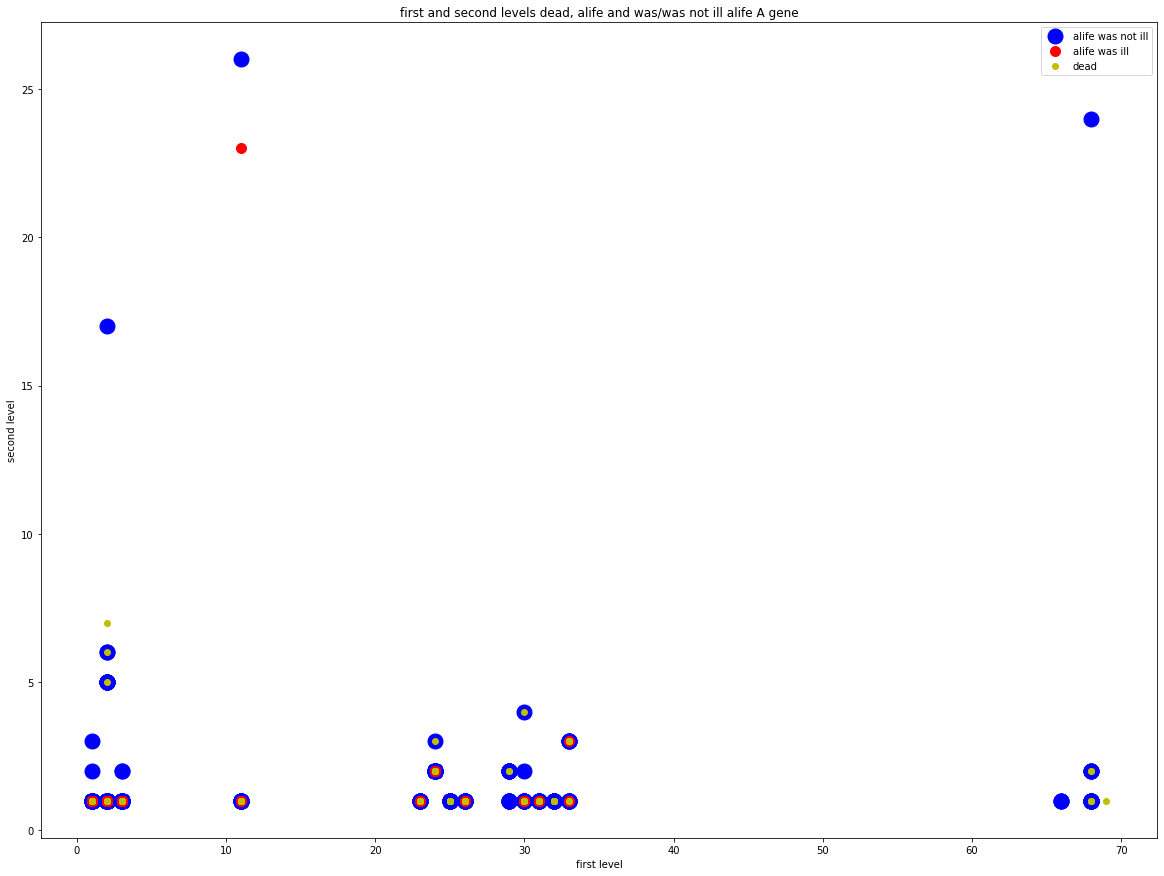

In [112]:
gene_name = 'A'
array_of_groups = [alife_was_not_ill_workbook, alife_was_ill_workbook, dead_workbook]
label_names = ['alife was not ill', 'alife was ill', 'dead']
#    blue - I alife_was_not_ill (не болели) - 245
#    red - II alife_was_ill (болели и выжили) - 25
#    yellow - IV dead (умершие) - 147
array_of_colour = ['bo', 'ro', 'yo']
array_of_size = [15, 10, 6]
title_name = 'first and second levels dead, alife and was/was not ill alife'
width_in_inches = 20
height_in_inches = 15


plot_for_gene(gene_name, array_of_groups, label_names, array_of_colour, \
              array_of_size, width_in_inches, height_in_inches, title_name)

## Plot first level frequency distribution


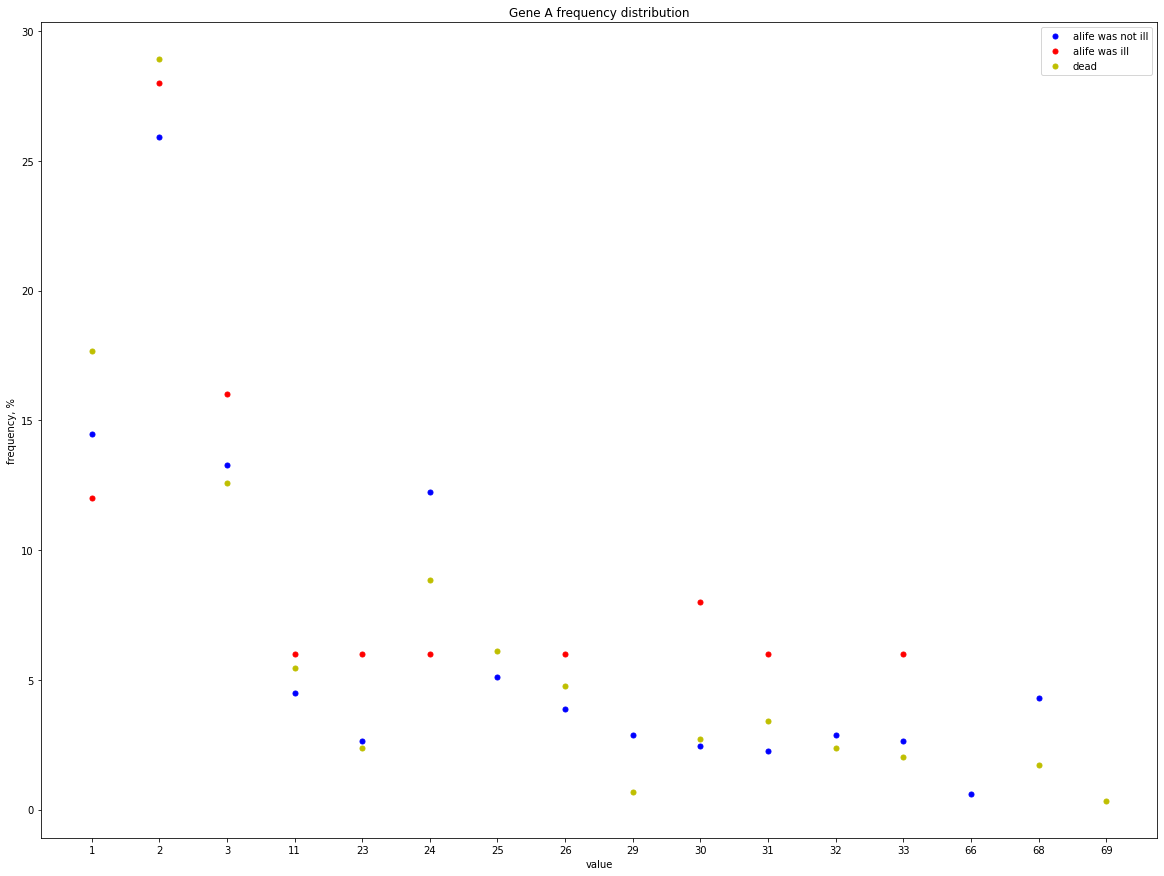

In [113]:
gene_name = 'A'
array_of_groups = [alife_was_not_ill_workbook, alife_was_ill_workbook, dead_workbook]
label_names = ['alife was not ill', 'alife was ill', 'dead']
array_of_colour = ['b.', 'r.', 'y.']
array_of_size = [8, 8, 8]
width_in_inches = 20
height_in_inches = 15

    
plot_frequency_distribution_for_gene(gene_name, array_of_groups, label_names, array_of_colour, \
                                     array_of_size, width_in_inches, height_in_inches)



# MAKE INPUT FOR ARLEQUIN SOFT


In [16]:
#Example:
#makepatient_2_figures_arlequin(alife_was_ill_gerontology_workbook)

In [17]:
makepatient_2_figures_arlequin(dead_workbook)

         ANC369    1      01:01 37:01 06:02 08:01 04:02 
                          01:01 51:01 14:02 10:01 05:01 
         APJ854    1      26:01 51:01 12:03 11:01 03:01 
                          30:01 51:01 15:02 14:03 03:01 
         ASW504    1      01:01 08:01 05:01 03:01 02:01 
                          24:02 44:02 07:01 04:01 03:01 
         BCR054    1      02:01 07:02 07:02 12:01 03:01 
                          31:01 39:01 12:03 15:01 06:02 
         BNS388    1      02:01 18:01 07:01 11:01 03:01 
                          24:02 18:01 07:01 14:01 05:03 
         BQK591    1      02:01 35:03 03:04 01:01 03:02 
                          02:01 40:01 04:01 04:03 05:01 
         BRR813    1      03:01 07:02 04:01 01:01 03:01 
                          11:01 51:01 07:02 04:07 05:01 
         BSE589    1      03:01 07:02 06:02 07:01 02:01 
                          24:02 13:02 07:02 11:04 03:01 
         BXS273    1      02:01 13:02 05:01 04:01 03:01 
                          24:02

                          03:01 39:06 07:02 15:01 06:02 
         XPP854    1      02:06 38:01 03:04 04:02 03:02 
                          26:01 40:02 12:03 15:01 06:02 
         XZF689    1      02:07 38:01 01:02 13:01 06:02 
                          26:01 46:01 12:03 15:01 06:03 
         YCM152    1      01:01 08:01 03:03 03:01 02:01 
                          02:01 15:01 07:01 13:01 06:03 
         YCO291    1      02:01 13:02 03:04 07:01 02:01 
                          03:01 40:01 06:02 13:01 06:03 
         YCW410    1      31:01 40:01 02:02 10:01 03:01 
                          32:01 40:02 03:04 11:01 05:01 
         YKH702    1      01:01 35:02 06:02 04:04 03:01 
                          24:02 39:01 07:02 11:04 03:02 
         YNF598    1      02:01 13:02 04:01 07:01 02:01 
                          23:01 44:03 06:02 07:01 02:01 
         ZEZ148    1      02:01 27:02 02:02 15:02 05:02 
                          02:01 52:01 12:02 16:01 06:01 
         ZFV905    1      02:01

# MAKE POPULATION HLA-DATA TABLE

In [116]:
#Example:
# makepatient_2_figures_table(alife_was_ill_workbook)

In [5]:
makepatient_2_figures_table(alife_was_ill_workbook)

pacient	A*		B*		C*		DRB1*		DQB1*
RMU011 	11:01	23:01	50:01	52:01	06:02	12:02	03:01	15:02	02:01	06:01	
RMU029 	02:01	03:01	15:18	51:01	07:04	14:02	07:01	15:01	02:01	06:02	
RMU045 	02:01	24:02	35:08	58:01	03:02	04:01	03:01	07:01	02:01	02:01	
RMU052 	03:01	31:01	07:02	39:01	02:02	07:02	04:01	15:01	03:02	06:02	
RMU055 	02:01	31:01	51:01	52:01	12:02	15:02	04:02	15:02	03:02	06:01	
RMU067 	02:01	24:02	15:01	51:01	03:03	14:02	08:01	13:01	04:02	06:03	
RMU070 	03:01	26:01	08:01	38:01	07:01	12:03	03:01	13:02	02:01	06:04	
RMU082 	02:01	30:01	13:02	44:02	05:01	06:02	04:01	11:04	03:01	03:01	
RMU096 	01:01	03:01	08:01	35:01	04:01	07:01	01:01	03:01	02:01	05:01	
RMU104 	02:01	33:01	08:01	14:02	07:01	08:02	01:02	03:01	02:01	05:01	
RMU105 	03:01	26:01	13:02	35:01	04:01	06:02	07:01	10:01	02:01	05:01	
RMU112 	01:01	23:01	44:03	57:01	04:01	06:02	07:01	11:01	02:01	03:01	
RMU116 	26:01	30:01	13:02	40:01	03:04	06:02	04:04	10:01	03:02	05:01	
RMU117 	01:01	11:01	27:05	52:01	02:02	12:02	08:01	13:03	03:01	04:02	
R

In [77]:
# MAKE POPULATION HLA-DATA TABLE and save it as csv

path='/home/irinab/Desktop/HLA/SARS_GWAS/data_plus_gerontology/'
makepatient_2_figures_table_csv(alife_was_not_ill_workbook,path+'group_I_data')
makepatient_2_figures_table_csv(alife_was_ill_workbook,path+'group_II_data')
makepatient_2_figures_table_csv(dead_workbook,path+'group_III_data')

makepatient_2_figures_table_csv(dead_workbook_less65,path+'group_IIIA_data')
makepatient_2_figures_table_csv(dead_workbook_more65,path+'group_IIIB_data')
makepatient_2_figures_table_csv(dead_acc_ill,path+'group_IIIC_data')
makepatient_2_figures_table_csv(dead_no_acc_ill,path+'group_IIID_data')
makepatient_2_figures_table_csv(alife_was_ill_gerontology_workbook,path+'group_IV_data')

number of people  245 
done
number of people  25 
done
number of people  147 
done
number of people  30 
done
number of people  67 
done
number of people  83 
done
number of people  14 
done


# STATISTICS PART

# STATISTICS - USE CHI2

In [24]:
from scipy.stats import chi2_contingency

## Functions

In [28]:
# count values and its count
def value_level_all_count(array_values):
    array_level1=array_values
    array_level1.sort(key=None, reverse=False)
    array_level1_count_key=[str(key) for key, group in groupby(array_level1)]
    array_level1_count_group=[len(list(group)) for key, group in groupby(array_level1)]
    return array_level1_count_key, array_level1_count_group

# find values of array in big array
def make_pop_array(whole_array, pop_arr):
    return_arr=[]
    #print(pop_arr[0],'\n\n')
    for i in range(0, len(whole_array)):
        #print (whole_array[i])
        if whole_array[i] in pop_arr[0]:
            value = pop_arr[1][pop_arr[0].index(whole_array[i])]
        else:
            value = 0
        return_arr.append(value)
    return return_arr

#V1
# take one random allele statistics
def take_one_no_len(workbook,gene_name):
    column = gene_column_dict[gene_name]
    len_workbook=workbook.max_row
    one_arr=[]
    for i in range(2, len_workbook+1):
        if (workbook[i][0].value is not None):
            aaa=[workbook[i][column].value,workbook[i][column+1].value]
            if aaa[1] == '-': aaa[1] = aaa[0]
            one_arr.append(cut_two_levels_split_arlequin(aaa[random.choice([0,1])]))
    return one_arr

# make statistics for one gene for population of few groups take one random allel
def make_stat_for_gene_take_one_well(populations_input,gene_name):
    print('\nGene: ', gene_name)
    column_gene = gene_column_dict[gene_name]
    populations_take_one=[]
    whole_array=[]
    populations_value_level=[]
    for i in range(0,len(populations_input)):
        current_key=take_one_no_len(populations_input[i],gene_name)
        populations_take_one.append(current_key)
        current_value_level=value_level_all_count(current_key)[0]
        populations_value_level.append(value_level_all_count(current_key))
        whole_array=whole_array+current_value_level
    
    whole_array=list(set(whole_array))
    whole_array.sort()
    print('Whole array of unique alleles:\n',whole_array)
    print('\nLength of whole array of unique alleles: ',len(whole_array))
    
    populations_stat=[]
    for i in range(0,len(populations_input)):
        populations_stat.append(make_pop_array(whole_array, populations_value_level[i]))
    print('\nPopulation stats for each group and its sum:')
    for item in populations_stat:
        print(item,sum(item),sep='\n')
    print('\n Statistics:')
    return chi2_contingency(populations_stat),whole_array,populations_stat

#V2
#take both allels like different patients
def take_two_no_len(workbook,gene_name):
    column = gene_column_dict[gene_name]
    len_workbook=workbook.max_row
    one_arr=[]
    for i in range(2, len_workbook+1):
        if (workbook[i][0].value is not None):
            aaa=[workbook[i][column].value,workbook[i][column+1].value]
            if aaa[1] == '-': aaa[1] = aaa[0]
            one_arr.append(cut_two_levels_split_arlequin(aaa[0]))
            one_arr.append(cut_two_levels_split_arlequin(aaa[1]))
    return one_arr

# make statistics for one gene for population of few groups take both allels like different patients
def make_stat_for_gene_take_two_well(populations_input,gene_name):
    print('\nGene: ', gene_name)
    column_gene = gene_column_dict[gene_name]
    populations_take_one=[]
    whole_array=[]
    populations_value_level=[]
    for i in range(0,len(populations_input)):
        current_key=take_two_no_len(populations_input[i],gene_name)
        populations_take_one.append(current_key)
        current_value_level=value_level_all_count(current_key)[0]
        populations_value_level.append(value_level_all_count(current_key))
        whole_array=whole_array+current_value_level
    whole_array=list(set(whole_array))
    whole_array.sort()
    print('Whole array of unique alleles:\n',whole_array)
    print('\nLength of whole array of unique alleles: ',len(whole_array))
    
    populations_stat=[]
    for i in range(0,len(populations_input)):
        populations_stat.append(make_pop_array(whole_array, populations_value_level[i]))
    print('\nPopulation stats for each group and its sum:')
    for item in populations_stat:
        print(item,sum(item),sep='\n')
    print('\n Statistics:')
    return chi2_contingency(populations_stat),whole_array,populations_stat

#V3
# take both allels like one patient
def take_both_merge_no_len(workbook,gene_name):
    column = gene_column_dict[gene_name]
    len_workbook=workbook.max_row
    one_arr=[]
    for i in range(2, len_workbook+1):
        if (workbook[i][0].value is not None):
            aaa1=[workbook[i][column].value,workbook[i][column+1].value]
            if aaa1[1] == '-': aaa1[1] = aaa1[0]
            aaa=[cut_two_levels_split_arlequin(aaa1[0]),cut_two_levels_split_arlequin(aaa1[1])]
            #aaa[0] == cut_two_levels_split(aaa1[0])
            #aaa[1] == cut_two_levels_split(aaa1[1])
            if int(aaa[0].split(":")[0])<int(aaa[1].split(":")[0]):
                one_arr.append(aaa[0]+'_'+aaa[1])
            elif int(aaa[0].split(":")[0])>int(aaa[1].split(":")[0]):
                one_arr.append(aaa[1]+'_'+aaa[0])
            else:
                if int(aaa[0].split(":")[1])<int(aaa[1].split(":")[1]):
                    one_arr.append(aaa[0]+'_'+aaa[1])
                else:
                    one_arr.append(aaa[1]+'_'+aaa[0])              
    return one_arr

def make_stat_for_gene_take_both_well(populations_input,gene_name):
    print('\nGene: ', gene_name)
    column_gene = gene_column_dict[gene_name]
    populations_take_one=[]
    whole_array=[]
    populations_value_level=[]
    for i in range(0,len(populations_input)):
        current_key=take_both_merge_no_len(populations_input[i],gene_name)
        populations_take_one.append(current_key)
        current_value_level=value_level_all_count(current_key)[0]
        populations_value_level.append(value_level_all_count(current_key))
        whole_array=whole_array+current_value_level
    whole_array=list(set(whole_array))
    whole_array.sort()
    print('Whole array of unique alleles:\n',whole_array)
    print('\nLength of whole array of unique alleles: ',len(whole_array))
    
    populations_stat=[]
    for i in range(0,len(populations_input)):
        populations_stat.append(make_pop_array(whole_array, populations_value_level[i]))
    print('\nPopulation stats for each group and its sum:')
    for item in populations_stat:
        print(item,sum(item),sep='\n')
    print('\n Statistics:')
    return chi2_contingency(populations_stat),whole_array,populations_stat

#V4
#function count patients with allel and without statistics

def value_level_all_count_like_one(array_values):
    array_level1=[]
    for item in array_values:
        array_level1.append(item)
    array_level1.sort(key=None, reverse=False)
    array_level1_count_key=[str(key) for key, group in groupby(array_level1)]
    array_level1_count_group=[]
    for item in array_level1_count_key:
        count=0
        for i in range(0,int(len(array_values)/2)):
            sil=0
            if (item==array_values[i*2]): sil+=1
            if (item==array_values[i*2+1]): sil+=1
            if sil==2: sil=1
            count+=sil
        
        array_level1_count_group.append(count)
    return array_level1_count_key, array_level1_count_group

def make_stat_for_gene_take_like_one_well(populations_input,gene_name):
    print('\nGene: ', gene_name)
    column_gene = gene_column_dict[gene_name]
    populations_take_one=[]
    whole_array=[]
    populations_value_level=[]
    for i in range(0,len(populations_input)):
        current_key=take_two_no_len(populations_input[i],gene_name)
        populations_take_one.append(current_key)
        current_value_level=value_level_all_count_like_one(current_key)[0]
        populations_value_level.append(value_level_all_count_like_one(current_key))
        whole_array=whole_array+current_value_level
    
    whole_array=list(set(whole_array))
    whole_array.sort()
    print('Whole array of unique alleles:\n',whole_array)
    print('\nLength of whole array of unique alleles: ',len(whole_array))
    
    populations_stat=[]
    for i in range(0,len(populations_input)):
        populations_stat.append(make_pop_array(whole_array, populations_value_level[i]))
    print('\nPopulation stats for each group and its sum:')
    for item in populations_stat:
        print(item,sum(item),sep='\n')
    print('\n Statistics:')
    return chi2_contingency(populations_stat),whole_array,populations_stat

## V1-V4 for population and gene

In [44]:
#Example V1-V4 for population

gene_name = 'A'

#populations_input_array=[students_workbook,dead_workbook]
#populations_input_array=[alife_was_not_ill_workbook,studentsilldead_workbook]
#populations_input_array=[alife_was_ill_workbook,dead_workbook,alife_was_not_ill_workbook]
#populations_input_array=[students_workbook,dead_workbook]
populations_input_array=[alife_was_not_ill_workbook,studentsilldead_workbook]

# V1
print('**V1** take one random allele\n')
print(make_stat_for_gene_take_one_well(populations_input_array,gene_name)[0][0:4])

# V2
print('\n**V2** take both allels like different patients\n')
print(make_stat_for_gene_take_two_well(populations_input_array,gene_name)[0][0:4])

# V3
print('\n**V3** take both allels like one patient\n')
print(make_stat_for_gene_take_both_well(populations_input_array,gene_name)[0][0:4])

# V4
print('\n**V4** count patients with allel\n')
print(make_stat_for_gene_take_like_one_well(populations_input_array,gene_name)[0][0:4])

**V1** take one random allele


Gene:  A
Whole array of unique alleles:
 ['01:01', '02:01', '02:05', '02:06', '02:07', '03:01', '03:02', '11:01', '23:01', '24:02', '25:01', '26:01', '29:01', '29:02', '30:01', '30:02', '31:01', '32:01', '33:01', '33:03', '68:01', '68:02']

Length of whole array of unique alleles:  22

Population stats for each group and its sum:
[38, 54, 4, 1, 0, 31, 2, 10, 9, 32, 11, 11, 3, 6, 5, 1, 5, 9, 2, 2, 6, 3]
245
[31, 44, 1, 0, 1, 21, 0, 11, 6, 12, 12, 8, 0, 1, 9, 0, 5, 3, 2, 3, 1, 1]
172

 Statistics:
(24.15594106182345, 0.2855642396860575, 21, array([[40.53956835, 57.57793765,  2.93764988,  0.58752998,  0.58752998,
        30.55155875,  1.17505995, 12.3381295 ,  8.81294964, 25.85131894,
        13.51318945, 11.16306954,  1.76258993,  4.11270983,  8.22541966,
         0.58752998,  5.87529976,  7.05035971,  2.3501199 ,  2.93764988,
         4.11270983,  2.3501199 ],
       [28.46043165, 40.42206235,  2.06235012,  0.41247002,  0.41247002,
        21.44844125,  0

Whole array of unique alleles:
 ['01:01', '01:02', '01:03', '02:01', '02:05', '02:06', '02:07', '02:17', '03:01', '03:02', '11:01', '23:01', '24:02', '24:03', '25:01', '26:01', '29:01', '29:02', '30:01', '30:02', '30:04', '31:01', '32:01', '33:01', '33:03', '66:01', '68:01', '68:02', '68:24', '69:01']

Length of whole array of unique alleles:  30

Population stats for each group and its sum:
[64, 1, 1, 106, 7, 2, 0, 1, 59, 2, 22, 12, 54, 1, 24, 18, 6, 8, 10, 1, 1, 11, 14, 9, 4, 3, 16, 4, 1, 0]
462
[52, 0, 0, 88, 1, 1, 1, 0, 43, 0, 19, 10, 27, 1, 18, 17, 0, 2, 11, 0, 1, 13, 7, 4, 5, 0, 3, 2, 0, 1]
327

 Statistics:
(34.18687466843203, 0.2324851716478604, 29, array([[ 67.92395437,   0.58555133,   0.58555133, 113.59695817,
          4.68441065,   1.75665399,   0.58555133,   0.58555133,
         59.72623574,   1.17110266,  24.00760456,  12.88212928,
         47.42965779,   1.17110266,  24.59315589,  20.49429658,
          3.51330798,   5.85551331,  12.29657795,   0.58555133,
          1.17

# STATISTICS - MAKE ANALYSIS OF EACH ONE ALLELE WITH HOLM AND BONFERRONI METHOD

CODE FOR HOLM MEDOD FROM THE SITE https://www.statsmodels.org/dev/_modules/statsmodels/stats/multitest.html#multipletests

how to use:
https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html

In [37]:
#import tsfresh
import statsmodels
import statsmodels.api as sm
from statsmodels.stats._knockoff import RegressionFDR

## Functions

In [38]:
'''Multiple Testing and P-Value Correction
Author: Josef Perktold
License: BSD-3
'''
__all__ = ['fdrcorrection', 'fdrcorrection_twostage', 'local_fdr',
           'multipletests', 'NullDistribution', 'RegressionFDR']

# Part 1: Multiple Tests and P-Value Correction
def _ecdf(x):
    '''no frills empirical cdf used in fdrcorrection
    '''
    nobs = len(x)
    return np.arange(1,nobs+1)/float(nobs)

multitest_methods_names = {'b': 'Bonferroni',
                           's': 'Sidak',
                           'h': 'Holm',
                           'hs': 'Holm-Sidak',
                           'sh': 'Simes-Hochberg',
                           'ho': 'Hommel',
                           'fdr_bh': 'FDR Benjamini-Hochberg',
                           'fdr_by': 'FDR Benjamini-Yekutieli',
                           'fdr_tsbh': 'FDR 2-stage Benjamini-Hochberg',
                           'fdr_tsbky': 'FDR 2-stage Benjamini-Krieger-Yekutieli',
                           'fdr_gbs': 'FDR adaptive Gavrilov-Benjamini-Sarkar'
                           }

_alias_list = [['b', 'bonf', 'bonferroni'],
               ['s', 'sidak'],
               ['h', 'holm'],
               ['hs', 'holm-sidak'],
               ['sh', 'simes-hochberg'],
               ['ho', 'hommel'],
               ['fdr_bh', 'fdr_i', 'fdr_p', 'fdri', 'fdrp'],
               ['fdr_by', 'fdr_n', 'fdr_c', 'fdrn', 'fdrcorr'],
               ['fdr_tsbh', 'fdr_2sbh'],
               ['fdr_tsbky', 'fdr_2sbky', 'fdr_twostage'],
               ['fdr_gbs']
               ]

multitest_alias = {}
for m in _alias_list:
    multitest_alias[m[0]] = m[0]
    for a in m[1:]:
        multitest_alias[a] = m[0]

def multipletests(pvals, alpha=0.05, method='hs', is_sorted=False,
                  returnsorted=False):
    """
    Test results and p-value correction for multiple tests
    """
    import gc
    pvals = np.asarray(pvals)
    alphaf = alpha  # Notation ?

    if not is_sorted:
        sortind = np.argsort(pvals)
        pvals = np.take(pvals, sortind)

    ntests = len(pvals)
    alphacSidak = 1 - np.power((1. - alphaf), 1./ntests)
    alphacBonf = alphaf / float(ntests)
    if method.lower() in ['b', 'bonf', 'bonferroni']:
        reject = pvals <= alphacBonf
        pvals_corrected = pvals * float(ntests)

    elif method.lower() in ['s', 'sidak']:
        reject = pvals <= alphacSidak
        pvals_corrected = 1 - np.power((1. - pvals), ntests)

    elif method.lower() in ['hs', 'holm-sidak']:
        alphacSidak_all = 1 - np.power((1. - alphaf),
                                       1./np.arange(ntests, 0, -1))
        notreject = pvals > alphacSidak_all
        del alphacSidak_all

        nr_index = np.nonzero(notreject)[0]
        if nr_index.size == 0:
            # nonreject is empty, all rejected
            notrejectmin = len(pvals)
        else:
            notrejectmin = np.min(nr_index)
        notreject[notrejectmin:] = True
        reject = ~notreject
        del notreject

        pvals_corrected_raw = 1 - np.power((1. - pvals),
                                           np.arange(ntests, 0, -1))
        pvals_corrected = np.maximum.accumulate(pvals_corrected_raw)
        del pvals_corrected_raw

    elif method.lower() in ['h', 'holm']:
        notreject = pvals > alphaf / np.arange(ntests, 0, -1)
        nr_index = np.nonzero(notreject)[0]
        if nr_index.size == 0:
            # nonreject is empty, all rejected
            notrejectmin = len(pvals)
        else:
            notrejectmin = np.min(nr_index)
        notreject[notrejectmin:] = True
        reject = ~notreject
        pvals_corrected_raw = pvals * np.arange(ntests, 0, -1)
        pvals_corrected = np.maximum.accumulate(pvals_corrected_raw)
        del pvals_corrected_raw
        gc.collect()

    elif method.lower() in ['sh', 'simes-hochberg']:
        alphash = alphaf / np.arange(ntests, 0, -1)
        reject = pvals <= alphash
        rejind = np.nonzero(reject)
        if rejind[0].size > 0:
            rejectmax = np.max(np.nonzero(reject))
            reject[:rejectmax] = True
        pvals_corrected_raw = np.arange(ntests, 0, -1) * pvals
        pvals_corrected = np.minimum.accumulate(pvals_corrected_raw[::-1])[::-1]
        del pvals_corrected_raw

    elif method.lower() in ['ho', 'hommel']:
        # we need a copy because we overwrite it in a loop
        a = pvals.copy()
        for m in range(ntests, 1, -1):
            cim = np.min(m * pvals[-m:] / np.arange(1,m+1.))
            a[-m:] = np.maximum(a[-m:], cim)
            a[:-m] = np.maximum(a[:-m], np.minimum(m * pvals[:-m], cim))
        pvals_corrected = a
        reject = a <= alphaf

    elif method.lower() in ['fdr_bh', 'fdr_i', 'fdr_p', 'fdri', 'fdrp']:
        # delegate, call with sorted pvals
        reject, pvals_corrected = fdrcorrection(pvals, alpha=alpha,
                                                 method='indep',
                                                 is_sorted=True)
    elif method.lower() in ['fdr_by', 'fdr_n', 'fdr_c', 'fdrn', 'fdrcorr']:
        # delegate, call with sorted pvals
        reject, pvals_corrected = fdrcorrection(pvals, alpha=alpha,
                                                 method='n',
                                                 is_sorted=True)
    elif method.lower() in ['fdr_tsbky', 'fdr_2sbky', 'fdr_twostage']:
        # delegate, call with sorted pvals
        reject, pvals_corrected = fdrcorrection_twostage(pvals, alpha=alpha,
                                                         method='bky',
                                                         is_sorted=True)[:2]
    elif method.lower() in ['fdr_tsbh', 'fdr_2sbh']:
        # delegate, call with sorted pvals
        reject, pvals_corrected = fdrcorrection_twostage(pvals, alpha=alpha,
                                                         method='bh',
                                                         is_sorted=True)[:2]

    elif method.lower() in ['fdr_gbs']:
        ii = np.arange(1, ntests + 1)
        q = (ntests + 1. - ii)/ii * pvals / (1. - pvals)
        pvals_corrected_raw = np.maximum.accumulate(q) #up requirementd

        pvals_corrected = np.minimum.accumulate(pvals_corrected_raw[::-1])[::-1]
        del pvals_corrected_raw
        reject = pvals_corrected <= alpha

    else:
        raise ValueError('method not recognized')

    if pvals_corrected is not None: #not necessary anymore
        pvals_corrected[pvals_corrected>1] = 1
    if is_sorted or returnsorted:
        return reject, pvals_corrected, alphacSidak, alphacBonf
    else:
        pvals_corrected_ = np.empty_like(pvals_corrected)
        pvals_corrected_[sortind] = pvals_corrected
        del pvals_corrected
        reject_ = np.empty_like(reject)
        reject_[sortind] = reject
        return reject_, pvals_corrected_, alphacSidak, alphacBonf



def fdrcorrection(pvals, alpha=0.05, method='indep', is_sorted=False):
    '''pvalue correction for false discovery rate
    '''
    pvals = np.asarray(pvals)

    if not is_sorted:
        pvals_sortind = np.argsort(pvals)
        pvals_sorted = np.take(pvals, pvals_sortind)
    else:
        pvals_sorted = pvals  # alias

    if method in ['i', 'indep', 'p', 'poscorr']:
        ecdffactor = _ecdf(pvals_sorted)
    elif method in ['n', 'negcorr']:
        cm = np.sum(1./np.arange(1, len(pvals_sorted)+1))   #corrected this
        ecdffactor = _ecdf(pvals_sorted) / cm
    else:
        raise ValueError('only indep and negcorr implemented')
    reject = pvals_sorted <= ecdffactor*alpha
    if reject.any():
        rejectmax = max(np.nonzero(reject)[0])
        reject[:rejectmax] = True

    pvals_corrected_raw = pvals_sorted / ecdffactor
    pvals_corrected = np.minimum.accumulate(pvals_corrected_raw[::-1])[::-1]
    del pvals_corrected_raw
    pvals_corrected[pvals_corrected>1] = 1
    if not is_sorted:
        pvals_corrected_ = np.empty_like(pvals_corrected)
        pvals_corrected_[pvals_sortind] = pvals_corrected
        del pvals_corrected
        reject_ = np.empty_like(reject)
        reject_[pvals_sortind] = reject
        return reject_, pvals_corrected_
    else:
        return reject, pvals_corrected



def fdrcorrection_twostage(pvals, alpha=0.05, method='bky', iter=False,
                           is_sorted=False):
    '''(iterated) two stage linear step-up procedure with estimation of number of true hypotheses
    '''
    pvals = np.asarray(pvals)

    if not is_sorted:
        pvals_sortind = np.argsort(pvals)
        pvals = np.take(pvals, pvals_sortind)

    ntests = len(pvals)
    if method == 'bky':
        fact = (1.+alpha)
        alpha_prime = alpha / fact
    elif method == 'bh':
        fact = 1.
        alpha_prime = alpha
    else:
        raise ValueError("only 'bky' and 'bh' are available as method")

    alpha_stages = [alpha_prime]
    rej, pvalscorr = fdrcorrection(pvals, alpha=alpha_prime, method='indep',
                                   is_sorted=True)
    r1 = rej.sum()
    if (r1 == 0) or (r1 == ntests):
        return rej, pvalscorr * fact, ntests - r1, alpha_stages
    ri_old = r1

    while True:
        ntests0 = 1.0 * ntests - ri_old
        alpha_star = alpha_prime * ntests / ntests0
        alpha_stages.append(alpha_star)
        #print ntests0, alpha_star
        rej, pvalscorr = fdrcorrection(pvals, alpha=alpha_star, method='indep',
                                       is_sorted=True)
        ri = rej.sum()
        if (not iter) or ri == ri_old:
            break
        elif ri < ri_old:
            # prevent cycles and endless loops
            raise RuntimeError(" oops - should not be here")
        ri_old = ri

    # make adjustment to pvalscorr to reflect estimated number of Non-Null cases
    # decision is then pvalscorr < alpha  (or <=)
    pvalscorr *= ntests0 * 1.0 /  ntests
    if method == 'bky':
        pvalscorr *= (1. + alpha)

    if not is_sorted:
        pvalscorr_ = np.empty_like(pvalscorr)
        pvalscorr_[pvals_sortind] = pvalscorr
        del pvalscorr
        reject = np.empty_like(rej)
        reject[pvals_sortind] = rej
        return reject, pvalscorr_, ntests - ri, alpha_stages
    else:
        return rej, pvalscorr, ntests - ri, alpha_stages



def local_fdr(zscores, null_proportion=1.0, null_pdf=None, deg=7,
              nbins=30, alpha=0):
    """
    Calculate local FDR values for a list of Z-scores.
    """

    from statsmodels.genmod.generalized_linear_model import GLM
    from statsmodels.genmod.generalized_linear_model import families
    from statsmodels.regression.linear_model import OLS

    # Bins for Poisson modeling of the marginal Z-score density
    minz = min(zscores)
    maxz = max(zscores)
    bins = np.linspace(minz, maxz, nbins)

    # Bin counts
    zhist = np.histogram(zscores, bins)[0]

    # Bin centers
    zbins = (bins[:-1] + bins[1:]) / 2

    # The design matrix at bin centers
    dmat = np.vander(zbins, deg + 1)

    # Rescale the design matrix
    sd = dmat.std(0)
    ii = sd >1e-8
    dmat[:, ii] /= sd[ii]

    start = OLS(np.log(1 + zhist), dmat).fit().params

    # Poisson regression
    if alpha > 0:
        md = GLM(zhist, dmat, family=families.Poisson()).fit_regularized(L1_wt=0, alpha=alpha, start_params=start)
    else:
        md = GLM(zhist, dmat, family=families.Poisson()).fit(start_params=start)

    # The design matrix for all Z-scores
    dmat_full = np.vander(zscores, deg + 1)
    dmat_full[:, ii] /= sd[ii]

    # The height of the estimated marginal density of Z-scores,
    # evaluated at every observed Z-score.
    fz = md.predict(dmat_full) / (len(zscores) * (bins[1] - bins[0]))

    # The null density.
    if null_pdf is None:
        f0 = np.exp(-0.5 * zscores**2) / np.sqrt(2 * np.pi)
    else:
        f0 = null_pdf(zscores)

    # The local FDR values
    fdr = null_proportion * f0 / fz

    fdr = np.clip(fdr, 0, 1)

    return fdr



class NullDistribution(object):
    """
    Estimate a Gaussian distribution for the null Z-scores.
    http://nipy.org/nipy/labs/enn.html#nipy.algorithms.statistics.empirical_pvalue.NormalEmpiricalNull.fdr
    """

    def __init__(self, zscores, null_lb=-1, null_ub=1, estimate_mean=True,
                 estimate_scale=True, estimate_null_proportion=False):

        # Extract the null z-scores
        ii = np.flatnonzero((zscores >= null_lb) & (zscores <= null_ub))
        if len(ii) == 0:
            raise RuntimeError("No Z-scores fall between null_lb and null_ub")
        zscores0 = zscores[ii]

        # Number of Z-scores, and null Z-scores
        n_zs, n_zs0 = len(zscores), len(zscores0)

        # Unpack and transform the parameters to the natural scale, hold
        # parameters fixed as specified.
        def xform(params):

            mean = 0.
            sd = 1.
            prob = 1.

            ii = 0
            if estimate_mean:
                mean = params[ii]
                ii += 1
            if estimate_scale:
                sd = np.exp(params[ii])
                ii += 1
            if estimate_null_proportion:
                prob = 1 / (1 + np.exp(-params[ii]))

            return mean, sd, prob


        from scipy.stats.distributions import norm


        def fun(params):
            """
            Negative log-likelihood of z-scores.

            The function has three arguments, packed into a vector:

            mean : location parameter
            logscale : log of the scale parameter
            logitprop : logit of the proportion of true nulls

            The implementation follows section 4 from Efron 2008.
            """

            d, s, p = xform(params)

            # Mass within the central region
            central_mass = (norm.cdf((null_ub - d) / s) -
                            norm.cdf((null_lb - d) / s))

            # Probability that a Z-score is null and is in the central region
            cp = p * central_mass

            # Binomial term
            rval = n_zs0 * np.log(cp) + (n_zs - n_zs0) * np.log(1 - cp)

            # Truncated Gaussian term for null Z-scores
            zv = (zscores0 - d) / s
            rval += np.sum(-zv**2 / 2) - n_zs0 * np.log(s)
            rval -= n_zs0 * np.log(central_mass)

            return -rval


        # Estimate the parameters
        from scipy.optimize import minimize
        # starting values are mean = 0, scale = 1, p0 ~ 1
        mz = minimize(fun, np.r_[0., 0, 3], method="Nelder-Mead")
        mean, sd, prob = xform(mz['x'])

        self.mean = mean
        self.sd = sd
        self.null_proportion = prob


    # The fitted null density function
    def pdf(self, zscores):
        """
        Evaluates the fitted empirical null Z-score density.
        """

        zval = (zscores - self.mean) / self.sd
        return np.exp(-0.5*zval**2 - np.log(self.sd) - 0.5*np.log(2*np.pi))

# MAKE ANALYSIS OF EACH ONE ALLELE WITH CHI2, HOLM AND BONFERRONI METHOD
## custom V(1-4) for custom population

In [47]:
#Example custom V(1-4) for custom population

### custom gene? variant and population:

# gene name
gene_name = 'A' 

# variant
variant_name = 'V4'
#V1 - take one random allele
#V2 - take both allels like different patients
#V3 - take both allels like one patient
#V4 - count patients with allel

# population (the order is not important)

#I+II+IV
#populations_input_array=[alife_was_ill_workbook,dead_workbook,alife_was_not_ill_workbook]

#I+II+III+IV
#populations_input_array=[alife_was_ill_workbook,dead_workbook,alife_was_not_ill_workbook,alife_was_ill_gerontology_workbook]

#(II+IIIA)+IV
#populations_input_array=[alife_was_ill_gerontology_workbook_less65_and_was_ill_students,dead_workbook]

#IVB+III
#populations_input_array=[dead_workbook_more65,alife_was_ill_gerontology_workbook]

#(I+II+III)+IV
#populations_input_array=[alife_workbook,dead_workbook]

#I+(II+III+IV)
#populations_input_array=[alife_was_not_ill_workbook,suffered_workbook]

#I+IIold+IV
#populations_input_array=[proverka_old_alife_was_ill_workbook,dead_workbook,alife_was_not_ill_workbook]

#(I+II)+IV
#populations_input_array=[students_workbook,dead_workbook]

#I+(II+IV)
#populations_input_array=[alife_was_not_ill_workbook,studentsilldead_workbook]

#I+II+IVA+IVB
#populations_input_array=[alife_was_ill_workbook,alife_was_not_ill_workbook,dead_workbook_less65,dead_workbook_more65]

#I+(II+III)+IVA+IVB
#populations_input_array=[alife_was_ill_students_gerontology_workbook,alife_was_not_ill_workbook,dead_workbook_less65,dead_workbook_more65]

#I+II+IVA+IVB+III
#populations_input_array=[alife_was_ill_workbook,alife_was_not_ill_workbook,dead_workbook_less65,dead_workbook_more65,alife_was_ill_gerontology_workbook]

#II+IVA+IVB
#populations_input_array=[alife_was_ill_workbook,dead_workbook_less65,dead_workbook_more65]

#(II+III)+IV
#populations_input_array=[alife_was_ill_students_gerontology_workbook,dead_workbook]

#IVA+IVB
#populations_input_array=[dead_workbook_less65,dead_workbook_more65]

#IVA+IVB+IIIA+IIIB
#populations_input_array=[dead_workbook_less65,dead_workbook_more65,alife_was_ill_gerontology_workbook_less65,alife_was_ill_gerontology_workbook_more65]

#IVB+IIIB
#populations_input_array=[dead_workbook_more65,alife_was_ill_gerontology_workbook_more65]

#IVA+IIIA
#populations_input_array=[dead_workbook_less65,alife_was_ill_gerontology_workbook_less65]


#(I+II)+IVA+IVB
#populations_input_array=[students_workbook,dead_workbook_less65,dead_workbook_more65]

#(I+II+III)+IVA+IVB
#populations_input_array=[alife_workbook,dead_workbook_less65,dead_workbook_more65]

#I+II
#populations_input_array=[alife_was_ill_workbook,alife_was_not_ill_workbook]

#II+IV
#populations_input_array=[alife_was_ill_workbook,dead_workbook]

#IVC+IVD
#populations_input_array=[dead_acc_ill,dead_no_acc_ill]

#IVA+IVB+IVC+IVD
#populations_input_array=[dead_workbook_less65,dead_workbook_more65,dead_acc_ill,dead_no_acc_ill]

#II+IVC+IVD
#populations_input_array=[alife_was_ill_workbook,dead_acc_ill,dead_no_acc_ill]

#(II+III)+IVC+IVD
#populations_input_array=[alife_was_ill_students_gerontology_workbook,dead_acc_ill,dead_no_acc_ill]

#(I+II+III)+IVA+IVB
populations_input_array=[alife_workbook,dead_workbook_less65,dead_workbook_more65]

#(I+II+III)+IVC+IVD
#populations_input_array=[alife_workbook,dead_acc_ill,dead_no_acc_ill]

#I+II+IVC+IVD
#populations_input_array=[alife_was_ill_workbook,alife_was_ill_workbook,dead_acc_ill,dead_no_acc_ill]

### code:

# Variant

if variant_name not in ('V1', 'V2', 'V3', 'V4'):
    variant_name = 'V4'
print('Variant: ', variant_name)

if variant_name == 'V1':
    result=make_stat_for_gene_take_one_well(populations_input_array,gene_name)
if variant_name == 'V2':
    result=make_stat_for_gene_take_two_well(populations_input_array,gene_name)
if variant_name == 'V3':
    result=make_stat_for_gene_take_both_well(populations_input_array,gene_name)
if variant_name == 'V4':
    result=make_stat_for_gene_take_like_one_well(populations_input_array,gene_name)

print('\n\n',result[0][0:4],'\n\n')
all_allels=result[1]
pop_counts=result[2]

print('\nnumber of allels: ',len(result[1]))
print('\nallels: ',result[1])
flag=0
for i in range (0,len(all_allels)):
    allel_number=i
    gen_arr=[]
    for item in pop_counts:
        gen_arr.append([item[allel_number],sum(item)-item[allel_number]])
    if chi2_contingency(gen_arr)[1]<0.05/len(result[1]):
        if flag==0: 
            print('\nAssociated allels by chi2 before correction: \nname | chi2_contingency | chi2_contingency with correction')
        print(all_allels[allel_number],chi2_contingency(gen_arr)[1],chi2_contingency(gen_arr)[1]*len(result[1]))
        flag+=1
    #print(all_allels[allel_number],chi2_contingency(gen_a_arr)[1])
if flag==0:
    print('No associated allels')
print('\nBonf p-value border:\n if allele p-value lower then border - allele is associated, \n\
        higher -  allele is not associated\n',0.05/len(result[1]))

print('\np-value: ',array_of_pvalue)
#print('\nnumber of allels: ',len(result[1]))

print('\n\nbonferroni: ')
stat_result_bonf=statsmodels.stats.multitest.multipletests(array_of_pvalue, alpha=0.05, method='bonferroni', \
                                                           is_sorted=False, returnsorted=False)
for i in range (0,len(stat_result_bonf[0])):
    if stat_result_bonf[0][i]==True:
        print(result[1][i],stat_result_bonf[1][i])
print(stat_result_bonf[1])

print('\n\nholm: ')  
stat_result_holm=statsmodels.stats.multitest.multipletests(array_of_pvalue, alpha=0.05, method='holm', \
                                                           is_sorted=False, returnsorted=False)
print(stat_result_holm[1])
for i in range (0,len(stat_result_holm[0])):
    if stat_result_holm[0][i]==True:
        print(result[1][i],stat_result_holm[1][i])

Variant:  V4

Gene:  A
Whole array of unique alleles:
 ['01:01', '01:02', '01:03', '02:01', '02:05', '02:06', '02:17', '03:01', '03:02', '11:01', '23:01', '24:02', '24:03', '25:01', '26:01', '29:01', '29:02', '30:01', '30:02', '30:04', '31:01', '32:01', '33:01', '33:03', '66:01', '68:01', '68:02', '68:24', '69:01']

Length of whole array of unique alleles:  29

Population stats for each group and its sum:
[89, 1, 1, 158, 9, 3, 1, 86, 2, 31, 18, 76, 1, 31, 29, 7, 9, 17, 2, 1, 17, 17, 16, 7, 3, 18, 6, 1, 0]
657
[12, 0, 0, 15, 0, 0, 0, 8, 0, 4, 1, 3, 1, 5, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1]
58
[23, 0, 0, 36, 1, 0, 0, 13, 0, 5, 4, 11, 0, 6, 6, 0, 1, 4, 0, 1, 5, 4, 2, 3, 0, 0, 1, 0, 0]
126

 Statistics:


 (49.11275158618038, 0.7310004121757182, 56, array([[9.68703924e+01, 7.81212842e-01, 7.81212842e-01, 1.63273484e+02,
        7.81212842e+00, 2.34363853e+00, 7.81212842e-01, 8.35897741e+01,
        1.56242568e+00, 3.12485137e+01, 1.79678954e+01, 7.03091558e+01,
        1.56242568e

# Make plots and tables with results

In [29]:
import seaborn as sb
import pandas as pd

## Functions

In [30]:
# V4 make table of procents of allele fraction of total for each group
def make_stat_for_gene_take_like_one_well_only_table(populations_input,gene_name):
    print('\nGene: ', gene_name)
    column_gene = gene_column_dict[gene_name]
    populations_take_one=[]
    whole_array=[]
    populations_value_level=[]
    for i in range(0,len(populations_input)):
        current_key=take_two_no_len(populations_input[i],gene_name)
        populations_take_one.append(current_key)
        current_value_level=value_level_all_count_like_one(current_key)[0]
        populations_value_level.append(value_level_all_count_like_one(current_key))
        whole_array=whole_array+current_value_level
    whole_array=sorted(list(set(whole_array)))  
    populations_stat=[]
    for i in range(0,len(populations_input)):
        all_count=populations_input[i].max_row-1
        absolut_values=make_pop_array(whole_array, populations_value_level[i])
        for i in range (0,len(absolut_values)):
            absolut_values[i]=round(100*absolut_values[i]/all_count, 1)
        populations_stat.append(absolut_values)    
    for i in range (0,len (whole_array)):
        ar=[]
        ar.append(whole_array[i])
        for j in range(0,len(populations_input)):
            ar.append(populations_stat[j][i])
        print(ar,end='\n')
    return whole_array,populations_stat,len(populations_input)



def make_table_file(result_info,output_name,array_col_names, gene_name):
    output_csv=output_name#+'.csv'
    whole_array=result_info[0]
    for i in range (0,len (whole_array)):
        whole_array[i]=gene_name+'*'+whole_array[i]
    populations_stat=result_info[1]
    lenlen=result_info[2]
    with open(output_csv, 'w', newline='\n') as file_output:
        writer = csv.writer(file_output)
        writer.writerow(array_col_names)
        for i in range (0,len (whole_array)):
            ar=[]
            ar.append(whole_array[i])
            for j in range(0,lenlen):
                ar.append(populations_stat[j][i])
            writer.writerow(ar)   
    print('\ndone')
    file_output.close()

## Make table of fractions of each allele in each group and save in csv if nesessary

In [185]:
# Example 
gene_name = 'DQB1'
#    "A","B","C","DRB1","DQB1"
populations_input_array = [alife_was_not_ill_workbook,\
                           alife_was_ill_workbook,\
                           alife_was_ill_gerontology_workbook,\
                           dead_workbook]

result = make_stat_for_gene_take_like_one_well_only_table(populations_input_array,gene_name)

#to save file and for headtmap and clustermap: 
name_of_file='gene_'+gene_name+'_I+II+III+IV.csv'

make_table_file(result,name_of_file,['gene '+gene_name,'I','II','III','IV'], gene_name) #the order is important


Gene:  DQB1
['02:01', 41.6, 52.0, 30.3, 36.7]
['03:01', 39.6, 20.0, 39.5, 38.8]
['03:02', 14.7, 28.0, 19.7, 12.9]
['03:03', 9.0, 0.0, 9.2, 14.3]
['03:04', 0.0, 0.0, 0.0, 1.4]
['03:05', 0.8, 0.0, 1.3, 0.0]
['04:01', 0.4, 0.0, 0.0, 0.7]
['04:02', 4.1, 8.0, 3.9, 6.1]
['05:01', 24.1, 28.0, 32.9, 17.0]
['05:02', 11.4, 4.0, 6.6, 10.2]
['05:03', 1.6, 0.0, 9.2, 4.8]
['06:01', 1.2, 12.0, 1.3, 5.4]
['06:02', 20.8, 12.0, 17.1, 20.4]
['06:03', 12.7, 8.0, 7.9, 12.9]
['06:04', 4.1, 8.0, 5.3, 2.7]
['06:09', 0.8, 0.0, 2.6, 0.7]

done


## Plot fractions of each allele in each group as barplot


Gene:  DQB1
['02:01', 41.6, 52.0, 30.3, 36.7]
['03:01', 39.6, 20.0, 39.5, 38.8]
['03:02', 14.7, 28.0, 19.7, 12.9]
['03:03', 9.0, 0.0, 9.2, 14.3]
['03:04', 0.0, 0.0, 0.0, 1.4]
['03:05', 0.8, 0.0, 1.3, 0.0]
['04:01', 0.4, 0.0, 0.0, 0.7]
['04:02', 4.1, 8.0, 3.9, 6.1]
['05:01', 24.1, 28.0, 32.9, 17.0]
['05:02', 11.4, 4.0, 6.6, 10.2]
['05:03', 1.6, 0.0, 9.2, 4.8]
['06:01', 1.2, 12.0, 1.3, 5.4]
['06:02', 20.8, 12.0, 17.1, 20.4]
['06:03', 12.7, 8.0, 7.9, 12.9]
['06:04', 4.1, 8.0, 5.3, 2.7]
['06:09', 0.8, 0.0, 2.6, 0.7]


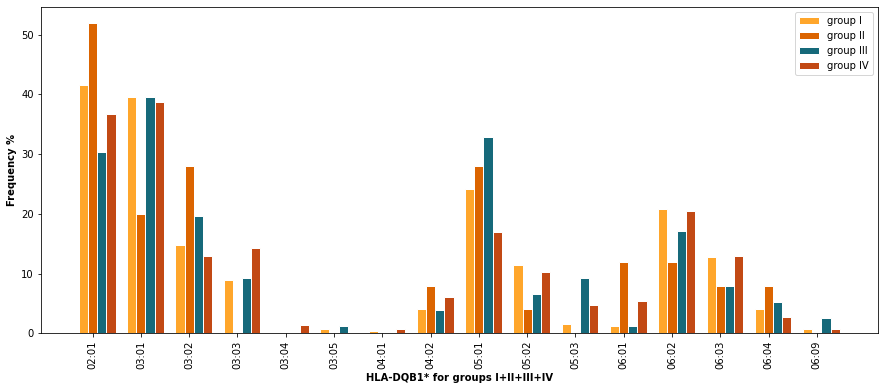

In [186]:
### custom 
#gene_name = 'A'
populations_input_array = [alife_was_not_ill_workbook,\
                           alife_was_ill_workbook,\
                           alife_was_ill_gerontology_workbook,\
                           dead_workbook]

result = make_stat_for_gene_take_like_one_well_only_table(populations_input_array,gene_name)
# change names in the cell-code below
barWidth = 0.19
width_in_inches=15
height_in_inches=6
save_fig = 'yes' # yes/no
name_fig = 'gene_' + gene_name + '_plot_I_II_III_IV.jpg'



### code default for 4 groups, change by yourself if necessary

plt.figure(figsize=(width_in_inches, height_in_inches))

bars1 = result[1][0]
bars2 = result[1][1]
bars3 = result[1][2]
bars4 = result[1][3]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, bars1, color='#ffa62b', width=barWidth, edgecolor='white', label='group I')
plt.bar(r2, bars2, color='#db6400', width=barWidth, edgecolor='white', label='group II')
plt.bar(r3, bars3, color='#16697a', width=barWidth, edgecolor='white', label='group III')
plt.bar(r4, bars4, color='#c24914', width=barWidth, edgecolor='white', label='group IV')

 
# Add xticks on the middle of the group bars
degrees = 90
plt.xticks(rotation=degrees)
plt.xlabel('HLA-'+gene_name+'* for groups I+II+III+IV', fontweight='bold')
plt.ylabel('Frequency %', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], result[0])

# Create legend & Show graphic
plt.legend()

#for B
#plt.annotate("*", (40.85,4),size=25,color='#c24914')
#plt.annotate("*", (8.85,4),size=25,color='#c24914')

#for C
#plt.annotate("*", (15.02,12),size=30,color='#c24914')

#for DQB1
#plt.annotate("*", (11.07,14),size=35,color='#c24914')

if save_fig == 'yes':
    plt.savefig(name_fig, bbox_inches='tight', dpi=1000)
plt.show()



## Plot fractions of each allele in each group as barplot for Russia (1510 persons) and our population


Gene:  DQB1
['02:01', 38.9, 15.5]
['02:02', 0.0, 18.6]
['03:01', 38.3, 36.8]
['03:02', 15.6, 15.1]
['03:03', 10.1, 11.2]
['03:04', 0.4, 0.8]
['03:05', 0.6, 1.1]
['03:30', 0.0, 0.1]
['04:01', 0.4, 0.0]
['04:02', 4.9, 6.3]
['05:01', 23.5, 26.8]
['05:02', 9.9, 9.3]
['05:03', 3.7, 3.4]
['05:04', 0.0, 0.5]
['06:01', 3.0, 2.4]
['06:02', 19.7, 23.8]
['06:03', 11.8, 12.7]
['06:04', 4.1, 3.9]
['06:09', 1.0, 1.2]


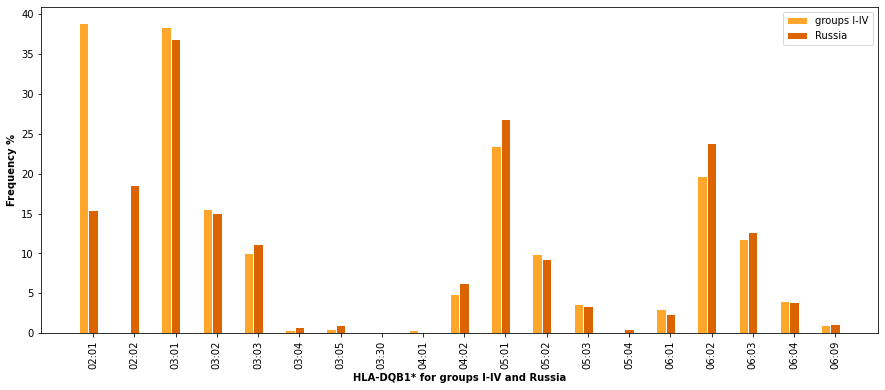

In [37]:
### custom 
gene_name = 'DQB1'
populations_input_array = [group_all,\
                           group_Russia]

result = make_stat_for_gene_take_like_one_well_only_table(populations_input_array,gene_name)
# change names in the cell-code below
barWidth = 0.23
width_in_inches=15
height_in_inches=6
save_fig = 'yes' # yes/no
name_fig = 'gene_' + gene_name + '_plot_I-IV_and_Russia.jpg'



### code default for 4 groups, change by yourself if necessary

plt.figure(figsize=(width_in_inches, height_in_inches))

bars1 = result[1][0]
bars2 = result[1][1]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]

# Make the plot
plt.bar(r1, bars1, color='#ffa62b', width=barWidth, edgecolor='white', label='groups I-IV')
plt.bar(r2, bars2, color='#db6400', width=barWidth, edgecolor='white', label='Russia')

 
# Add xticks on the middle of the group bars
degrees = 90
plt.xticks(rotation=degrees)
plt.xlabel('HLA-'+gene_name+'* for groups I-IV and Russia', fontweight='bold')
plt.ylabel('Frequency %', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], result[0])

# Create legend & Show graphic
plt.legend()

#for B
#plt.annotate("*", (40.85,4),size=25,color='#c24914')
#plt.annotate("*", (8.85,4),size=25,color='#c24914')

#for C
#plt.annotate("*", (15.02,12),size=30,color='#c24914')

#for DQB1
#plt.annotate("*", (11.07,14),size=35,color='#c24914')

if save_fig == 'yes':
    plt.savefig(name_fig, bbox_inches='tight', dpi=1000)
plt.show()


## Plot fractions of each allele in each group as heatmap

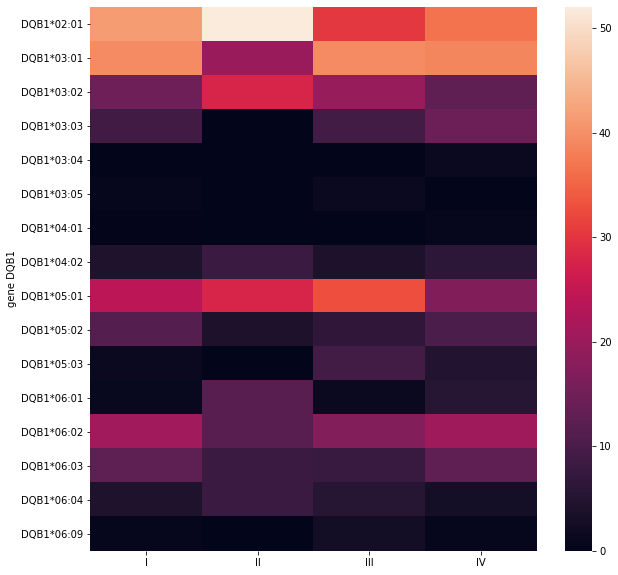

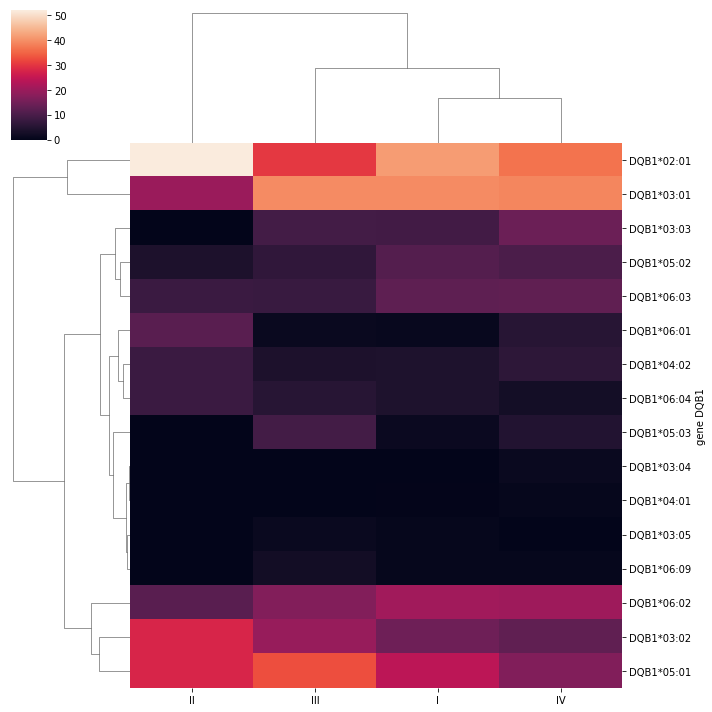

In [187]:
### custom 
#name_of_file = 'gene_A_I+II+III+IV.csv'

data=pd.read_csv(name_of_file, sep=',', index_col=0)
plt.figure(figsize=(10, 10))
sb.heatmap(data)
# save if nesessary
plt.savefig(name_of_file[0:-4]+'_heatmap.jpg', bbox_inches='tight', dpi=500)


sb.clustermap(data)
# save if nesessary
plt.savefig(name_of_file[0:-4]+'_clustermap.jpg', bbox_inches='tight', dpi=500)

# leftover code: analysis for all genes in one cell

In [141]:
def analysis_for_gene(gene_name,populations_input_array,variant):
    col_number_input = gene_column_dict[gene_name]
    if variant==1: result=make_stat_for_gene_take_one_well(populations_input_array,gene_name)
    elif variant==2: result=make_stat_for_gene_take_two_well(populations_input_array,gene_name)
    elif variant==3: result=make_stat_for_gene_take_both_well(populations_input_array,gene_name)
    elif variant==4: result=make_stat_for_gene_take_like_one_well(populations_input_array,gene_name)
    print('\n\nGene: ',col_number_input)
    print('\n\n',result[0][0:3],'\n\n')
    all_allels=result[1]
    pop_counts=result[2]
    array_of_pvalue=[]
    flag=0
    for i in range (0,len(all_allels)):
        allel_number=i
        gen_arr=[]
        for item in pop_counts:
            gen_arr.append([item[allel_number],sum(item)-item[allel_number]])
        array_of_pvalue.append(chi2_contingency(gen_arr)[1])
    print('\nallels: ',result[1])
   ########### print('\np-value: ',array_of_pvalue)
    print('\nnumber of allels: ',len(result[1]))
    print('\n\nbonferroni: ')
    stat_result_bonf=statsmodels.stats.multitest.multipletests(array_of_pvalue, alpha=0.05, method='bonferroni', is_sorted=False, returnsorted=False)

    for i in range (0,len(stat_result_bonf[0])):
        if stat_result_bonf[0][i]==True:
            print(result[1][i],stat_result_bonf[1][i])
    print(stat_result_bonf[1])

    print('\n\nholm: ')  
    stat_result_holm=statsmodels.stats.multitest.multipletests(array_of_pvalue, alpha=0.05, method='holm', is_sorted=False, returnsorted=False)
    print(stat_result_holm[1])
    for i in range (0,len(stat_result_holm[0])):
        if stat_result_holm[0][i]==True:
            print(result[1][i],stat_result_holm[1][i])

In [142]:
## ANALYSIS FOR EACH ALLELE FOR GENE ##

## make pop array

populations_input_array=[alife_workbook,dead_workbook_less65,dead_workbook_more65]

#WELL functions colling:
#result=make_stat_for_gene_take_one_well(populations_input_array,col_number)
#result=make_stat_for_gene_take_two_well(populations_input_array,col_number)
#result=make_stat_for_gene_take_both_well(populations_input_array,col_number)
#result=make_stat_for_gene_take_like_one_well(populations_input_array,col_number)

print('--------\nA')
analysis_for_gene('A',populations_input_array,4)
print('--------\nB')
analysis_for_gene('B',populations_input_array,4)
print('--------\nC')
analysis_for_gene('C',populations_input_array,4)
print('--------\nDRB')
analysis_for_gene('DRB1',populations_input_array,4)
print('--------\nDQB')
analysis_for_gene('DQB1',populations_input_array,4)

--------
A

Gene:  A
Whole array of unique alleles:
 ['01:01', '01:02', '01:03', '02:01', '02:05', '02:06', '02:17', '03:01', '03:02', '11:01', '23:01', '24:02', '24:03', '25:01', '26:01', '29:01', '29:02', '30:01', '30:02', '30:04', '31:01', '32:01', '33:01', '33:03', '66:01', '68:01', '68:02', '68:24', '69:01']

Length of whole array of unique alleles:  29

Population stats for each group and its sum:
[89, 1, 1, 158, 9, 3, 1, 86, 2, 31, 18, 76, 1, 31, 29, 7, 9, 17, 2, 1, 17, 17, 16, 7, 3, 18, 6, 1, 0]
657
[12, 0, 0, 15, 0, 0, 0, 8, 0, 4, 1, 3, 1, 5, 1, 0, 0, 2, 0, 0, 1, 1, 0, 1, 0, 2, 0, 0, 1]
58
[23, 0, 0, 36, 1, 0, 0, 13, 0, 5, 4, 11, 0, 6, 6, 0, 1, 4, 0, 1, 5, 4, 2, 3, 0, 0, 1, 0, 0]
126

 Statistics:


Gene:  1


 (49.11275158618038, 0.7310004121757182, 56) 



allels:  ['01:01', '01:02', '01:03', '02:01', '02:05', '02:06', '02:17', '03:01', '03:02', '11:01', '23:01', '24:02', '24:03', '25:01', '26:01', '29:01', '29:02', '30:01', '30:02', '30:04', '31:01', '32:01', '33:01', '33:0